In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline


In [2]:
df=pd.read_csv('owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [3]:
Nepal_df=df[df['location']=='Nepal']
Nepal_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
31904,NPL,Asia,Nepal,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
31905,NPL,Asia,Nepal,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
31906,NPL,Asia,Nepal,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
31907,NPL,Asia,Nepal,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
31908,NPL,Asia,Nepal,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574


In [4]:
Nepal_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [5]:
columns_to_drop=['iso_code','continent','location','population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index']
Nepal_df_copy=Nepal_df
Nepal_df=Nepal_df.drop(columns_to_drop,axis=1)

In [6]:
Nepal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290 entries, 31904 to 32193
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   date                             290 non-null    object 
 1   total_cases                      277 non-null    float64
 2   new_cases                        277 non-null    float64
 3   new_cases_smoothed               284 non-null    float64
 4   total_deaths                     277 non-null    float64
 5   new_deaths                       277 non-null    float64
 6   new_deaths_smoothed              284 non-null    float64
 7   total_cases_per_million          277 non-null    float64
 8   new_cases_per_million            277 non-null    float64
 9   new_cases_smoothed_per_million   284 non-null    float64
 10  total_deaths_per_million         277 non-null    float64
 11  new_deaths_per_million           277 non-null    float64
 12  new_deaths_smoot

In [7]:
Nepal_df.isna().sum()

date                                0
total_cases                        13
new_cases                          13
new_cases_smoothed                  6
total_deaths                       13
new_deaths                         13
new_deaths_smoothed                 6
total_cases_per_million            13
new_cases_per_million              13
new_cases_smoothed_per_million      6
total_deaths_per_million           13
new_deaths_per_million             13
new_deaths_smoothed_per_million     6
new_tests                          67
total_tests                        54
total_tests_per_thousand           54
new_tests_per_thousand             67
new_tests_smoothed                 37
new_tests_smoothed_per_thousand    37
tests_per_case                     86
positive_rate                      37
tests_units                        30
stringency_index                    8
dtype: int64

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))

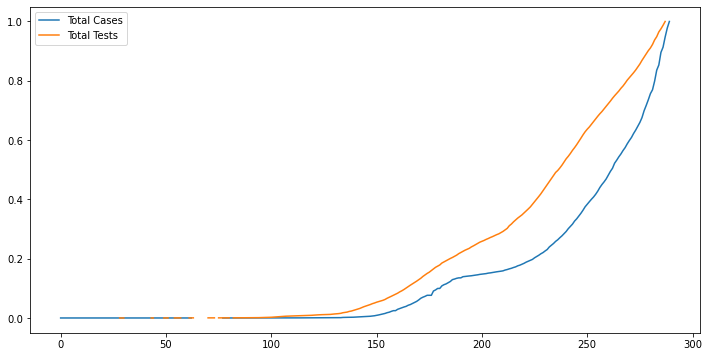

In [9]:
plt.figure(figsize=(12,6),)
plt.plot(scaler.fit_transform(Nepal_df['total_cases'].values.reshape(-1,1)),label='Total Cases')
plt.plot(scaler.fit_transform(Nepal_df['total_tests'].values.reshape(-1,1)),label='Total Tests')
plt.legend()